In [3]:
import string
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# grab the h1b data
h1b = pd.read_csv("../dat/db246968-e567-442f-8108-b86a280107d3_H-1BVisaApplications-2014.csv")

In [4]:
# let's see all the columns
h1b.columns

Index(['lca_case_number', 'status', 'lca_case_submit', 'decision_date',
       'visa_class', 'lca_case_employment_start_date',
       'lca_case_employment_end_date', 'lca_case_employer_name',
       'lca_case_employer_address', 'lca_case_employer_city',
       'lca_case_employer_state', 'lca_case_employer_postal_code',
       'lca_case_soc_code', 'lca_case_soc_name', 'lca_case_job_title',
       'lca_case_wage_rate_from', 'lca_case_wage_rate_to',
       'lca_case_wage_rate_unit', 'full_time_pos', 'total_workers',
       'lca_case_workloc1_city', 'lca_case_workloc1_state', 'pw_1',
       'pw_unit_1', 'pw_source_1', 'other_wage_source_1', 'yr_source_pub_1',
       'lca_case_workloc2_city', 'lca_case_workloc2_state', 'pw_2',
       'pw_unit_2', 'pw_source_2', 'other_wage_source_2', 'yr_source_pub_2',
       'lca_case_naics_code'],
      dtype='object')

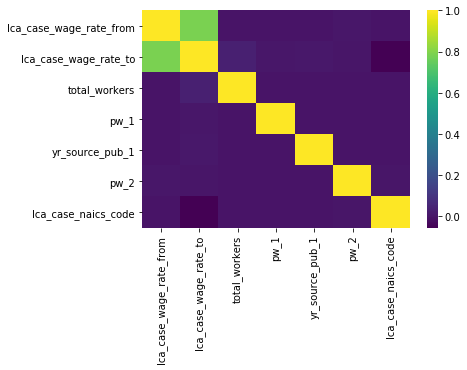

In [71]:
corr = h1b.corr()
sns.heatmap(corr, cmap=plt.get_cmap("viridis"),
            xticklabels=corr.columns,
            yticklabels=corr.columns)

# Not many numeric values so far

In [58]:
# case numbers are unique
print(h1b.lca_case_number.nunique())
print(h1b.shape)

519504
(519504, 35)


In [8]:
h1b.fillna("00").groupby("status").size()

status
CERTIFIED              455144
CERTIFIED-WITHDRAWN     36350
DENIED                  11938
INVALIDATED                 1
REJECTED                    2
WITHDRAWN               16069
dtype: int64

In [6]:
h1b.full_time_pos.unique()
h1b.fillna(0).groupby("full_time_pos").size()
# should exclude part time since it's impossible to compare without knowing the time worked

full_time_pos
0         5
N     14213
Y    505286
dtype: int64

In [12]:
# see is there a good way to normalise the pay rates
print(h1b.groupby("lca_case_wage_rate_unit").size())
print(h1b.groupby("pw_unit_1").size())

lca_case_wage_rate_unit
Bi-Weekly       136
Hour          37106
Month           649
Week            322
Year         481255
dtype: int64
pw_unit_1
Bi-Weekly        51
Hour          37643
Month           475
Week            239
Year         481019
dtype: int64


In [15]:
# what to do about cases whree prevailing wages and wage rates aren't in the same units?
# do the normalised values look right?
h1b[h1b.pw_unit_1 != h1b.lca_case_wage_rate_unit].loc[:, ["status", "visa_class", "lca_case_wage_rate_from", "lca_case_wage_rate_unit", "pw_1", "pw_unit_1"]]

,status,visa_class,lca_case_wage_rate_from,lca_case_wage_rate_unit,pw_1,pw_unit_1
20,CERTIFIED-WITHDRAWN,H-1B,71148.00,Year,23.58,Hour
29,CERTIFIED,H-1B,30.00,Hour,55680.00,Year
30,WITHDRAWN,H-1B,84178.00,Year,35.53,Hour
96,WITHDRAWN,H-1B,NaN,NaN,NaN,NaN
119,WITHDRAWN,H-1B,NaN,NaN,NaN,NaN
1364,CERTIFIED-WITHDRAWN,H-1B,97272.79,Year,42.87,Hour
1957,CERTIFIED-WITHDRAWN,H-1B,1304.78,Week,51002.00,Year
2074,CERTIFIED-WITHDRAWN,H-1B,40123.00,Year,40123.00,Month
2093,CERTIFIED-WITHDRAWN,H-1B,4500.00,Month,53040.00,Year
2300,CERTIFIED-WITHDRAWN,H-1B,87152.00,Year,41.90,Hour


In [35]:
# How many industries are there?
h1b.lca_case_naics_code.nunique()

2792

In [10]:
# let's see the top employers
employergroup = h1b.groupby("lca_case_employer_name").size().reset_index(name= "employer_count")
employergroup[employergroup["employer_count"] > 5].sort_values("employer_count", ascending=False)

,lca_case_employer_name,employer_count
29258,INFOSYS LIMITED,23759
58511,TATA CONSULTANCY SERVICES LIMITED,14098
66842,WIPRO LIMITED,8365
16455,DELOITTE CONSULTING LLP,7017
943,ACCENTURE LLP,5498
28200,IBM INDIA PRIVATE LIMITED,5029
26474,"HCL AMERICA, INC.",4749
20098,ERNST & YOUNG U.S. LLP,3961
34368,LARSEN & TOUBRO INFOTECH LIMITED,3939
38949,MICROSOFT CORPORATION,3750


In [32]:
h1b[h1b["lca_case_employer_name"].isnull()]

,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,...,other_wage_source_1,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code
96,I-200-10102-762348,WITHDRAWN,2014-04-17,2014-04-24,H-1B,2010-09-20,2013-09-20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,I-200-10146-697955,WITHDRAWN,2014-01-28,2014-01-28,H-1B,2010-12-01,2013-12-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3844,I-200-11223-829335,WITHDRAWN,2014-05-06,2014-05-06,H-1B,2011-09-30,2014-09-29,NaN,NaN,PHOENIX,...,OFLC ONLINE DATA CENTER,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212299.0
6098,I-200-11363-113265,WITHDRAWN,2014-05-06,2014-05-06,H-1B,2012-01-07,2015-01-06,NaN,NaN,NaN,...,OFLC ONLINE DATA CENTER,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523920.0
8147,I-200-12088-862964,WITHDRAWN,2014-05-06,2014-05-06,H-1B,2012-09-27,2015-09-26,NaN,NaN,NaN,...,OFLC ONLINE DATA CENTER,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212299.0
8939,I-200-12111-276328,WITHDRAWN,2014-04-09,2014-04-09,H-1B,2012-04-21,2015-04-20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10424,I-200-12153-687552,WITHDRAWN,2014-05-06,2014-05-06,H-1B,2012-10-01,2015-09-30,NaN,NaN,SAN FRANCISCO,...,OFLC ONLINE DATA CENTER,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,518210.0
17515,I-200-13077-014691,WITHDRAWN,2014-05-06,2014-05-06,H-1B,2013-09-17,2016-09-16,NaN,NaN,NaN,...,OFLC ONLINE DATA CENTER,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87110.0
18745,I-200-13087-054483,WITHDRAWN,2014-05-09,2014-05-09,H-1B,2013-09-27,2016-09-26,NaN,NaN,SAN FRANCISCO,...,OFLC ONLINE DATA CENTER,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,519130.0
19518,I-200-13106-309367,WITHDRAWN,2013-10-22,2013-10-22,H-1B,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
h1b.fillna("00").groupby("lca_case_employer_name").size().sort_values(ascending=False).iloc[:500]

lca_case_employer_name
INFOSYS LIMITED                                       23759
TATA CONSULTANCY SERVICES LIMITED                     14098
WIPRO LIMITED                                          8365
DELOITTE CONSULTING LLP                                7017
ACCENTURE LLP                                          5496
IBM INDIA PRIVATE LIMITED                              5002
HCL AMERICA, INC.                                      4738
ERNST & YOUNG U.S. LLP                                 3961
LARSEN & TOUBRO INFOTECH LIMITED                       3939
MICROSOFT CORPORATION                                  3378
IGATE TECHNOLOGIES INC.                                3124
GOOGLE INC.                                            2889
IBM CORPORATION                                        2396
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION        2358
INTEL CORPORATION                                      2353
TECH MAHINDRA (AMERICAS), INC.                         1932
DELOITTE & TOUCHE

In [6]:
# see how the addresses look for the same company
h1b[h1b.lca_case_employer_name == "INFOSYS LIMITED"].loc[:, ["lca_case_employer_address", "lca_case_employer_city", "lca_case_employer_state", "lca_case_employer_postal_code"]]

,lca_case_employer_address,lca_case_employer_city,lca_case_employer_state,lca_case_employer_postal_code
19496,6100 TENNYSON PARKWAY,PLANO,TX,75024
22349,6100 TENNYSON PARKWAY,PLANO,TX,75024
22517,"6100, TENNYSON PKWY",PLANO,TX,75024
22757,6100 TENNYSON PARKWAY,PLANO,TX,75024
25375,6100 TENNYSON PARKWAY,PLANO,TX,75024
25404,6100 TENNYSON PARKWAY,PLANO,TX,75024
25439,6100 TENNYSON PARKWAY,PLANO,TX,75024
25442,6100 TENNYSON PARKWAY,PLANO,TX,75024
25448,6100 TENNYSON PARKWAY,PLANO,TX,75024
25454,6100 TENNYSON PARKWAY,PLANO,TX,75024


In [8]:
# see how the addresses look for the same company
h1b[h1b.lca_case_employer_name == "AMERISOFTPRO SYSTEMS LLC"].loc[:, ["lca_case_employer_address", "lca_case_employer_city", "lca_case_employer_state", "lca_case_employer_postal_code"]]

,lca_case_employer_address,lca_case_employer_city,lca_case_employer_state,lca_case_employer_postal_code
6647,3 EXECUTIVE DRIVE,SOMERSET,NJ,8873
26944,3 EXECUTIVE DRIVE,SOMERSET,NJ,8873
27593,3 EXECUTIVE DRIVE,SOMERSET,NJ,8873
37201,3 EXECUTIVE DRIVE,SOMERSET,NJ,8873
41850,3 EXECUTIVE DRIVE,SOMERSET,NJ,8873
45805,3 EXECUTIVE DRIVE,SOMERSET,NJ,8873
50429,3 EXECUTIVE DRIVE,SOMERSET,NJ,8873
51548,3 EXECUTIVE DRIVE,SOMERSET,NJ,8873
63048,3 EXECUTIVE DRIVE,SOMERSET,NJ,8873
73659,3 EXECUTIVE DRIVE,SOMERSET,NJ,8873


In [66]:
# got a few extra states...
h1b.lca_case_employer_state.unique()

array(['TX', 'IN', 'MN', 'GA', 'VA', 'NJ', 'KS', 'KY', 'CA', 'IL', 'FL',
       'MA', 'NY', 'MI', 'NE', 'AL', 'TN', 'WA', 'PA', 'IA', nan, 'MD',
       'OR', 'CT', 'WI', 'CO', 'DC', 'OK', 'MO', 'OH', 'NC', 'DE', 'RI',
       'AK', 'LA', 'AZ', 'NH', 'AR', 'HI', 'WY', 'SC', 'UT', 'WV', 'NM',
       'ME', 'ID', 'MT', 'MS', 'NV', 'SD', 'ND', 'MP', 'VI', 'VT', 'GU',
       'PR'], dtype=object)

In [85]:
h1b[h1b["lca_case_employer_state"] == "NY"].lca_case_employer_city.unique()

# Check it out, one of these is listed as San Francisco! Didn't know there was one in NY...

array(['NEW YORK', 'COLD SPRING HARBOR', 'ROCHESTER', 'STONY BROOK', 'RYE',
       'CORNING', 'SYOSSET', 'BRONX', 'ORCHARD PARK', 'NEW YORK CITY',
       'BUFFALO', 'ISLANDIA', 'HAUPPAUGE', 'MELVILLE', 'SHELTER ISLAND',
       'VALHALLA', 'PAWLING', 'EAST HAMPTON', 'AMSTERDAM',
       'LONG ISLAND CITY', 'SKANEATELSE FALLS', 'BROOKLYN', 'PURCHASE',
       'SYRACUSE', 'NEW PALTZ', 'BINGHAMTON', 'FLUSHING', 'PEARL RIVER',
       'FAIRPORT', 'ALBANY', 'MACEDON', 'SARATOGA SPRINGS', 'TROY',
       'MILLBROOK', '39TH FLOOR', 'ORANGEBURG', 'WHITE PLAINS', 'EDGEWOOD',
       'ROCK HILL', 'VICTOR', 'NORTH SALEM', 'GARDEN CITY', 'LATHAM',
       'SCHENECTADY', 'CARMEL', 'UPTON', 'CLINTON', 'EAST AURORA',
       'VOORHEESVILLE', 'BABYLON', 'CLARENCE', 'THORNWOOD', 'CENTEREACH',
       'MINEOLA', 'MARGARETVILLE,', 'BREWSTER', 'MALTA', 'CAZENOVIA',
       'SUITE 223', 'YONKERS', 'UNIONDALE', 'MANHASSET', 'BRONX, NEW YORK',
       'FOREST HILLS', 'WATERTOWN', 'BRONXVILLE', 'BAYSIDE', 'NORWICH',
   

In [20]:
# add an nyc column to include all companies within the boroughs
valid_nyc = ['NEW YORK', 'BRONX', 'NEW YORK CITY', 'LONG ISLAND CITY', 'BROOKLYN', 'FLUSHING',
             'BRONX, NEW YORK', 'FOREST HILLS', 'BAYSIDE',
             'FUSHING', 'ASTORIA', 'NEW YORK, NEW YORK', 'WOODSIDE', 'STATEN ISLAND', 'SUNNYSIDE', 'JAMACIA',
             'JAMAICA', 'FORESTHILLS', 'RIDGEWOOD', 'QUEENS', 'ELMHURST', 'NEW YORK, NY',
             'JACKSON HEIGHTS', 'QUEENS VILLAGE', 'FAR ROCKAWAY', 'ROCKAWAY PARK', 'FOREST FILLS',
             'FRESH MEADOWS', 'NEW YORK, NEW YORK 10003', 'WHITESTONE', 'L.I.C.', 'OZONE PARK',
             'CITY OF NEW YORK', 'NEW YORK,NEW YORK', 'NEWYORK', 'LONGISLAND CITY', 'MANHATTAN',
             'WILLIAMSBURGH', 'LIC', 'EAST ELMHURST', 'NEW YORK,', 'FORREST HILLS', 'STATEN ISLAND,',
             'NEW YORKI', 'NEW YOK', 'NEW YROK', 'LONG ISLAND CITY,', 'SOUTH OZONE PARK', 'ELMURST', 
             'FLUSHING, NY', 'WILLIAMSBURG, BROOKLYN', 'NYC', 'NEW YORK CIY', 'BROOKLYM']
h1b["nyc"] = np.zeros((h1b.shape[0]))
h1b.loc[h1b["lca_case_employer_city"].isin(valid_nyc), "nyc"] = 1

In [90]:
h1b[(h1b["lca_case_employer_city"] == "39TH FLOOR") | (h1b["lca_case_employer_city"] == 'SUITE 223') |
    (h1b["lca_case_employer_city"] == "LEVEL 9") | (h1b["lca_case_employer_city"] == "31ST FLOOR") | 
    (h1b["lca_case_employer_city"] == "29TH FLOOR") | (h1b["lca_case_employer_city"] == "65 VESTRY STREET") |
    (h1b["lca_case_employer_city"] == '20 AUGUSTA PL') | (h1b["lca_case_employer_city"] == '601 W. 26TH ST., SUITE 325-57') | 
    (h1b["lca_case_employer_city"] == '12TH FLOOR') | (h1b["lca_case_employer_city"] == 'SUITE 350')]

,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,...,other_wage_source_1,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code
7406,I-200-12073-027230,WITHDRAWN,2012-03-13,2014-09-12,H-1B,2012-04-01,2015-04-01,"ONE WILLIAM STREET CAPITAL MANAGEMENT, LP",1271 AVENUE OF THE AMERICAS,39TH FLOOR,...,OFLC ONLINE DATA CENTER,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523900.0
14072,I-200-12348-605365,CERTIFIED-WITHDRAWN,2012-12-13,2014-04-09,H-1B,2013-01-07,2016-01-06,"THE VERITAS HEALTHCARE SOLUTIONS, LLC","469, 7TH AVE, 3RD FLOOR",SUITE 223,...,OFLC ONLINE DATA CENTER,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541720.0
55122,I-200-13306-238680,CERTIFIED,2013-11-02,2013-11-12,H-1B,2013-11-02,2016-09-30,"NOVISYNC SOLUTIONS, INC.",300 WESTAGE BUSINESS CENTER DRIVE,SUITE 350,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541513.0
159569,I-200-14045-296644,CERTIFIED,2014-02-14,2014-02-21,H-1B,2014-08-14,2017-08-14,"BIRCHBOX, INC.",28 EAST 28TH STREET,12TH FLOOR,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4539.0
160254,I-200-14045-564233,CERTIFIED,2014-02-14,2014-02-21,H-1B,2014-08-14,2017-08-14,"BIRCHBOX, INC.",28 EAST 28TH STREET,12TH FLOOR,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4539.0
164272,I-200-14048-714901,DENIED,2014-02-17,2014-02-24,H-1B,2014-06-16,2017-06-15,"OPEN ASSEMBLY, INC.",@CENTRE FOR SOCIAL INNOVATION,"601 W. 26TH ST., SUITE 325-57",...,"FLC DATA CENTER, ONLINE WAGE LIBRARY: HTTP://W...",2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5112.0
199407,I-200-14060-910446,CERTIFIED,2014-03-03,2014-03-07,H-1B,2014-03-24,2017-03-23,ACCORD POWER,"135-27 38TH AVENUE,SUITE 119",20 AUGUSTA PL,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238220.0
301041,I-200-14079-534809,CERTIFIED,2014-03-21,2014-03-27,H-1B,2014-09-01,2017-08-31,AVO CONSTRUCTION LLC,NaN,65 VESTRY STREET,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236220.0
446532,I-200-14203-217797,CERTIFIED,2014-07-22,2014-07-28,H-1B,2014-08-11,2017-08-10,"TRICADIA HOLDINGS, LP",780 THIRD AVENUE,29TH FLOOR,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523930.0
493618,I-200-14252-193281,CERTIFIED,2014-09-09,2014-09-15,H-1B,2014-09-22,2017-08-28,"GT NEXUS, INC.",55 WATER STREET,31ST FLOOR,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,518210.0


In [29]:
# definitely some issues with the zipcode data here - we've gotta find the unique zipcodes (5 digit)
# One of them just says "NEW YORK"...
h1b[h1b["lca_case_employer_state"] == "NY"].lca_case_employer_postal_code.unique()
# Some are only 4 digits long and some definitely are not new york zip codes...

array(['10004', '10019', '10022', '11724', '10017', '10024', '14623',
       '10016', '10036', '11794-4433', '10580', '10282', '10012', '10005',
       '10020', '10007', '14831', '10010-3629', '10001', '11794', '10166',
       '10006', '11791', '10018', '10467', '14127', '14627', '10014',
       '10121', '10032', '11794-8705', '10105', '11794-3393', '10003',
       '14644', '14201', '10010', '10152', '11749', '11788', '10036-6796',
       '14202', '10281-1198', '10011', '11747', '10153', '10013', '10112',
       '10023', '10027', '10154', '11964', '10595', '10038', '12564',
       '11937', '10158', '10122', '12010', '10281', '10173', '14604',
       '11101', '13152', '11201-3949', '10285', '14605', '10104', '10577',
       '14692-2970', '10178', '13202', '12561', '13904', '14608', '11201',
       '10041', '11367', '10965', '10065', '14063', '14450', '11365',
       '12204', '14502', '12866-4391', '14209', '12180', '10005-1081',
       '12545', '10962', '10604', '11717', '12775', '14564

In [33]:
# Some of these NEW YORK zip code entries were certified so they have other meaningful data :/
h1b[h1b["lca_case_employer_state"] == "NY"][h1b["lca_case_employer_postal_code"] == "NEW YORK"]

/home/kilian/.envs/bittrex/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,...,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code,nyc
48381,I-200-13302-081305,CERTIFIED,2013-10-29,2013-11-04,H-1B,2013-11-21,2016-11-21,MIO PARTNERS INC.,PARK AVENUE PLAZA,NEW YORK,...,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541610.0,1.0
153661,I-200-14043-511703,DENIED,2014-02-21,2014-02-27,H-1B,2014-03-03,2017-03-02,"DOLCE & GABBANA USA, INC.",148 LAFAYETTE STREET,NEW YORK,...,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4481.0,1.0
180713,I-200-14055-619321,CERTIFIED,2014-02-28,2014-03-06,H-1B,2014-08-27,2017-08-26,AADOBE ANIMAL HOSPITAL,1294 FOREST AVE,STATEN ISLAND,...,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541940.0,1.0
207875,I-200-14063-477360,CERTIFIED,2014-03-12,2014-03-18,H-1B,2014-09-06,2017-09-05,JOYSTICK INTERACTIVE CORP.,"37 W 17TH STREET, SUITE 6E",NEW YORK,...,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5418.0,1.0
315250,I-200-14083-836176,CERTIFIED,2014-04-03,2014-04-09,H-1B,2014-10-01,2017-09-30,"VITECH SYSTEMS GROUP, INC.",401 PARK AVENUE SOUTH,NEW YORK,...,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,514512.0,1.0
347397,I-200-14106-745636,CERTIFIED,2014-04-16,2014-04-25,H-1B,2014-04-28,2017-04-28,"SOTHEBY'S, INC.",1334 YORK AVENUE,NEW YORK,...,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453920.0,1.0
368787,I-200-14126-907101,CERTIFIED,2014-05-08,2014-05-14,H-1B,2014-07-22,2017-07-21,NEW YORK BLOOD CENTER,45-01 VERNON BOULEVARD,LONG ISLAND CITY,...,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,621991.0,1.0
380216,I-200-14136-574893,WITHDRAWN,2014-05-16,2014-05-16,H-1B,2014-06-19,2017-06-18,UNITED CEREBRAL PALSY OF NEW YORK CITY,80 MAIDEN LANE - 8TH FLOOR,NEW YORK,...,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624120.0,1.0
464972,I-200-14220-273157,CERTIFIED,2014-09-12,2014-09-18,H-1B,2014-09-12,2017-09-11,LF DISTRIBUTION INTERNATIONAL INC.,1359 BROADWAY,NEW YORK,...,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423990.0,1.0
517193,I-203-14177-778566,CERTIFIED,2014-06-27,2014-07-03,E-3 Australian,2014-10-22,2016-10-21,"QBE AMERICAS, INC.",WALL STREET PLAZA,NEW YORK,...,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524126.0,1.0


In [21]:
# How many zipcodes in the full dataset have non-numeric values?
[zipcode for zipcode in h1b["lca_case_employer_postal_code"].fillna("00000").unique() if np.array([z in string.ascii_letters for z in zipcode]).any()]
# some of these values are Canadian zip codes it seems??? Even an Australian one

# if we feel like we need it later, we can fix these by making queries of the address
# to the google maps api and grabbing the zipcodes from there

['92708-N/A',
 'HUDSON',
 'NEW YORK',
 'V6J-1C7',
 'SAN DIEGO',
 'M3C 2K8',
 'OAKLAND',
 'L5R 0B7',
 '85034-N/A',
 'NY',
 'ILLINOIS',
 'SOMERSET',
 'SUITE 506',
 'ALAMEDA',
 'CA 92705',
 'LOS ANGELES',
 'NSW 2000',
 '10170-N/A',
 'G74 5PA',
 'GWINNETT',
 'BROWARD',
 'RIVERSIDE',
 'WP5PB',
 'M5J 1R7',
 '554O2',
 'FULTON',
 'COOK',
 'HAUPPAUGE',
 'DOUGLAS',
 'MIDDLESEX',
 '0T6520/8224',
 'MA',
 'MI',
 'V6J 1C7',
 'V6C 1C7',
 'V7X1G4',
 'HOUSTON',
 'M5V 1E',
 'M5V 1E3']

In [29]:
# this number has a letter in it...
print('O' in string.ascii_letters)
int('554O2')

True


ValueError: invalid literal for int() with base 10: '554O2'

In [31]:
h1b.loc[h1b["lca_case_employer_postal_code"] == '554O2', "lca_case_employer_postal_code"] = '55402'

In [1]:
h1b[pd.isnull(h1b.lca_case_employer_postal_code)]

NameError: name 'h1b' is not defined

In [20]:
# So let's get the New York City visas by zipcode (zipcode file taken from nyc open data)
nyzipdf = pd.read_csv("New_York_State_ZIP_Codes-County_FIPS_Cross-Reference.csv")
nyzipdf

,County Name,State FIPS,County Code,County FIPS,ZIP Code,File Date
0,Albany,36,1,36001,12046,07/25/2007
1,Albany,36,1,36001,12083,07/25/2007
2,Albany,36,1,36001,12085,07/25/2007
3,Albany,36,1,36001,12201,07/25/2007
4,Albany,36,1,36001,12203,07/25/2007
5,Albany,36,1,36001,12055,07/25/2007
6,Albany,36,1,36001,12204,07/25/2007
7,Albany,36,1,36001,12023,07/25/2007
8,Albany,36,1,36001,12087,07/25/2007
9,Albany,36,1,36001,12205,07/25/2007


In [27]:
nyzips = nyzipdf["ZIP Code"][nyzipdf["County Name"].isin(["New York", "Kings", "Queens", "Bronx", "Richmond"])]
nyzips

59      10472
60      10463
61      10468
62      10457
64      10467
68      10462
69      10456
70      10469
71      10453
72      10454
73      10464
78      10474
82      10803
83      10704
85      10499
436     11221
437     11220
438     11224
440     11202
441     11212
442     11218
443     11225
444     11207
446     11216
447     11217
448     11208
449     11230
450     11223
451     11215
452     11203
        ...  
2275    10115
2290    10173
2304    10002
2321    11001
2322    11229
2356    10285
2360    11435
2372    11423
2377    10111
2383    10113
2399    10103
2400    10107
2418    10550
2430    11256
2445    11420
2450    10037
2465    11247
2477    10292
2483    11357
2485    11365
2490    10075
2491    11428
2518    11451
2519    10101
2523    11242
2534    10162
2535    10117
2537    10131
2539    10159
2541    10120
Name: ZIP Code, Length: 324, dtype: int64

In [49]:
# Let's get a column of integer, 5-digit zipcodes in the dataframe
first5zips = [zipcode[:5] for zipcode in h1b["lca_case_employer_postal_code"].fillna("00000")]
first5zips = [int(zipcode) if np.array([z in string.digits for z in zipcode]).all() else 0 for zipcode in first5zips ]
h1b["intzip"] = np.array(first5zips)
h1b["intzip"]

0         78666
1         46202
2         55802
3         30045
4         20147
5          8540
6          8540
7         66219
8         40243
9         78229
10         8816
11        95110
12        60173
13        30022
14        22031
15        75039
16        33133
17        75039
18         8854
19        60015
20        78229
21        92126
22        22182
23        60015
24        77042
25        60015
26        60563
27        94403
28        60015
29        33178
          ...  
519474    11101
519475    90067
519476    60077
519477    20705
519478    94303
519479    92821
519480    98101
519481    85250
519482    10005
519483     7068
519484    10018
519485    10003
519486    90291
519487    49419
519488    92562
519489    77099
519490    22102
519491    92831
519492    37203
519493    10001
519494    94402
519495    94965
519496    80503
519497    84105
519498    27560
519499    80401
519500    94402
519501    96813
519502    85714
519503    10005
Name: intzip, Length: 51

In [ ]:
##### Just realised that the lca_case_employer_* fields are for the employer's address,
# but we should really be concerned with lca_case_workloc* values since they tell you where
# the person getting the visa is located...

h1b[h1b["lca_case_workloc1_state"] == "NY"].lca_case_workloc1_city.unique()
# about as bad as last time...

In [40]:
# let's see what California looks like
h1b[h1b["lca_case_workloc1_state"] == "CA"].lca_case_workloc1_city.nunique()

1066

In [42]:
# As a first order of magnitude test, let's assume that NYC and SF are responsible for the majority of visas
# in their respective states.
cacnt = h1b[h1b["lca_case_workloc1_state"] == "CA"].groupby("lca_case_workloc1_city").size().reset_index(name="CA_count")
cacnt.sort_values("CA_count", ascending=False)

,lca_case_workloc1_city,CA_count
783,SAN FRANCISCO,11360
803,SAN JOSE,9268
939,SUNNYVALE,6555
553,MOUNTAIN VIEW,5328
844,SANTA CLARA,5129
772,SAN DIEGO,4924
454,LOS ANGELES,4079
386,IRVINE,3256
628,PALO ALTO,3088
315,FREMONT,2469


In [43]:
nycnt = h1b[h1b["lca_case_workloc1_state"] == "NY"].groupby("lca_case_workloc1_city").size().reset_index(name="NY_count")
nycnt.sort_values("NY_count", ascending=False)

# So to first order, New York (not counting Brooklyn, LIC, Bronx, Flshing, etc.) has 3 times as
# many visa applications than SF (not counting places in South Bay, East Bay, etc.)

# But what about population? NYC has 8m, Manhattan has ~2m. SF has 1m, but people outside of SF work in SF...

,lca_case_workloc1_city,NY_count
437,NEW YORK,32170
99,BROOKLYN,1890
26,ALBANY,904
361,LONG ISLAND CITY,850
90,BRONX,755
104,BUFFALO,686
539,ROCHESTER,636
390,MELVILLE,469
216,FLUSHING,435
622,SYRACUSE,398


In [11]:
h1b.dropna(subset=["lca_case_wage_rate_unit"]).fillna(" ").groupby("lca_case_wage_rate_unit")["lca_case_number"].count()

lca_case_wage_rate_unit
Bi-Weekly       136
Hour          37106
Month           649
Week            322
Year         481255
Name: lca_case_number, dtype: int64

In [6]:
h1b.fillna(" ").groupby("pw_unit_1")["lca_case_number"].count()

pw_unit_1
                 77
Bi-Weekly        51
Hour          37643
Month           475
Week            239
Year         481019
Name: lca_case_number, dtype: int64

In [41]:
print(h1b.visa_class.unique())
print(h1b[h1b["visa_class"] == 'H-1B'].shape[0])
print(h1b[h1b["visa_class"] == 'E-3 Australian'].shape[0])
print(h1b[h1b["visa_class"] == 'H-1B1 Chile'].shape[0])
print(h1b[h1b["visa_class"] == 'H-1B1 Singapore'].shape[0])

['H-1B' 'E-3 Australian' 'H-1B1 Chile' 'H-1B1 Singapore']
508676
9446
557
825


In [49]:
h1bonly = h1b[h1b["visa_class"] == 'H-1B']
h1bonly.status.unique()

array(['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED', 'WITHDRAWN',
       'REJECTED'], dtype=object)

In [44]:
h1b.status.unique()

array(['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED', 'WITHDRAWN',
       'REJECTED', 'INVALIDATED'], dtype=object)

In [11]:
h1b["lca_case_submit"] = h1b.lca_case_submit.astype("datetime64[ns]")
h1b["decision_date"] = h1b["decision_date"].astype("datetime64[ns]")

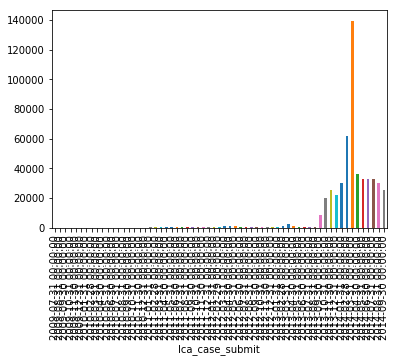

In [17]:
# h1b.groupby(h1b["lca_case_submit"].dt.month).count().plot(kind="bar")
# sns.distplot(h1b["lca_case_submit"].dt.month)
h1b.groupby(pd.Grouper(key="lca_case_submit", freq='1M'))["visa_class"].count().plot(kind='bar')

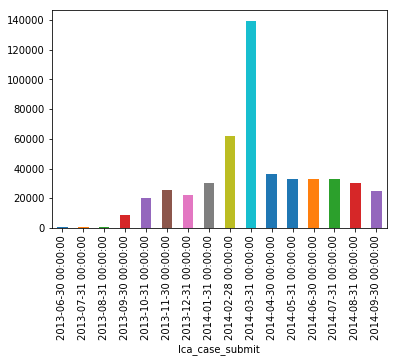

In [27]:
# let's see how it looks with every case submission pre- Oct 2013 removed
h1b = h1b[h1b["lca_case_submit"] > "2013-06-01"]
h1b.groupby(pd.Grouper(key="lca_case_submit", freq='1M'))["visa_class"].count().plot(kind='bar')

In [24]:
h1b.shape

(497796, 35)

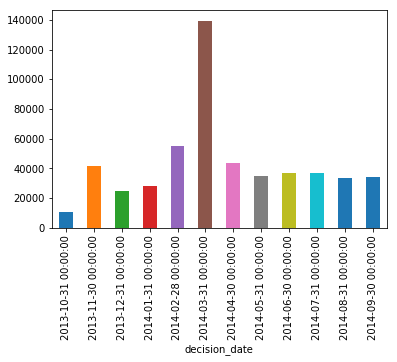

In [42]:
h1b.groupby(pd.Grouper(key="decision_date", freq='1M'))["visa_class"].count().plot(kind='bar')

In [12]:
h1b["lca_case_employment_start_date"] = pd.to_datetime(h1b["lca_case_employment_start_date"])
h1b["lca_case_employment_end_date"] = pd.to_datetime(h1b["lca_case_employment_end_date"])

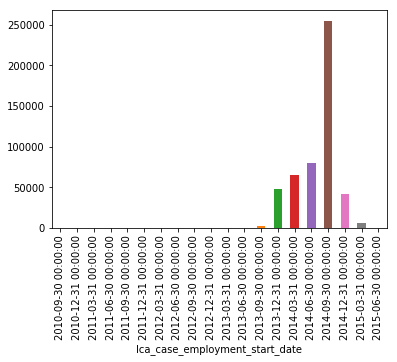

In [26]:
h

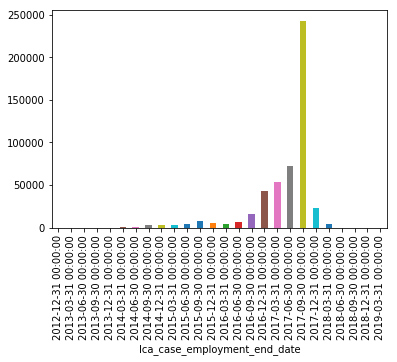

In [27]:
h1b.groupby(pd.Grouper(key="lca_case_employment_end_date", freq='3M'))["visa_class"].count().plot(kind='bar')

In [49]:
(h1b["lca_case_employment_end_date"] - h1b["lca_case_employment_start_date"]) > pd.Timedelta("{:} days".format(3 * 365))

1          True
2         False
3         False
4          True
5         False
6         False
7         False
10         True
13        False
14         True
15         True
17         True
18         True
19         True
21         True
23         True
24        False
25         True
26        False
27        False
28         True
29        False
31         True
33        False
34        False
35        False
36        False
37        False
38        False
39        False
          ...  
519474    False
519475    False
519476    False
519477    False
519478    False
519479    False
519480    False
519481    False
519482    False
519483    False
519484    False
519485    False
519486    False
519487    False
519488    False
519489    False
519490    False
519491    False
519492    False
519493    False
519494    False
519495    False
519496    False
519497    False
519498    False
519499    False
519500    False
519501    False
519502    False
519503    False
Length: 497796, dtype: b

In [53]:
# see are any of the durations of employment greater than 3 years
h1b[(h1b["lca_case_employment_end_date"] - h1b["lca_case_employment_start_date"]) > pd.Timedelta("{:} days".format(3 * 365 + 1))]

,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,...,other_wage_source_1,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code
46030,I-200-13298-421111,DENIED,2013-10-25,2013-11-06,H-1B,2014-01-01,2017-12-29,TUFTS UNIVERSITY SCHOOL OF MEDICINE,136 HARRISON AVE,BOSTON,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,611310.0
71269,I-200-13324-708144,DENIED,2013-11-20,2013-11-25,H-1B,2014-01-01,2019-01-01,D.K.G NATURE'S CURE INC.,37010 17TH AVE SOUTH,FEDERAL WAY,...,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5112.0
71555,I-200-13324-940035,DENIED,2013-11-20,2013-11-25,H-1B,2014-01-01,2017-12-31,"ATP TOUR, INC.",201 ATP TOUR BLVD.,PONTE VEDRA BEACH,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711320.0
273395,I-200-14076-124633,DENIED,2014-03-17,2014-03-26,H-1B,2014-09-16,2017-09-17,"CEREBRA CONSULTING, INC.","1950 STREET ROAD, SUITE 315",BENSALEM,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541511.0
442120,I-200-14198-245431,DENIED,2014-07-17,2014-07-23,H-1B,2014-07-17,2017-08-18,CREATIVE HEALTH SOLUTIONS,1800 N. WABASH AVE.,MARION,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,621491.0


In [17]:
# see are any LCAs submitted more than 6 months before start date (not allowed)
h1b[(h1b["lca_case_employment_start_date"] - h1b["lca_case_submit"]) > pd.Timedelta("183 days")]

,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,...,other_wage_source_1,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code
39046,I-200-13294-526452,WITHDRAWN,2014-03-06,2014-03-12,H-1B,2014-10-01,2017-09-30,"VOLUME DISTRIBUTORS, INC.",4199 BANDINI BOULEVARD,VERNON,...,FLC DATA CENTER ONLINE WAGE LIBRARY,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42449.0
77930,I-200-13336-355739,DENIED,2014-01-22,2014-01-27,H-1B,2014-10-01,2017-09-30,PUNTA CANA RESTAURANT LLC,17776 STATE HIGHWAY 249 SUITE 21,HOUSTON,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,722511.0
86078,I-200-13345-482323,DENIED,2014-01-23,2014-01-29,H-1B,2014-10-01,2017-09-30,"BUSINESS LAW ASSOCIATES, LLC",1700 ROCKVILLE PIKE,ROCKVILLE,...,FOREIGN LABOR CERTIFICATION CENTER ONLINE LIBRARY,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541110.0
101806,I-200-14006-244497,DENIED,2014-01-06,2014-01-08,H-1B,2014-10-01,2017-09-30,"SIGMAPHARM LABORATORIES, LLC",3375 PROGRESS DRIVE,BENSALEM,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325411.0
104937,I-200-14008-906534,DENIED,2014-01-24,2014-01-29,H-1B,2014-10-01,2017-09-30,"NEUROCOG TRIALS, INC.",6820 CREEK WOOD DRIVE,CHAPEL HILL,...,OFLC DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541690.0
112764,I-200-14016-340824,DENIED,2014-01-23,2014-01-29,H-1B,2014-10-01,2017-09-30,"PYES & CHERIN, LLP",29 S. LA SALLE STREET,CHICAGO,...,NaN,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541110.0
114556,I-200-14017-620767,DENIED,2014-03-18,2014-03-25,H-1B,2014-10-01,2017-09-30,"ALTAMANU, INC.",1700 W. IRVING PARK RD.,CHICAGO,...,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541320.0
115210,I-200-14020-063710,DENIED,2014-01-24,2014-01-29,H-1B,2014-10-01,2017-09-30,AMERICAN ASSOCIATION OF SCHOOL ADMINISTRATORS ...,1615 DUKE STREET,ALEXANDRIA,...,FOREIGN LABOR CERTIFICATION CENTER ONLINE LIBRARY,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81392.0
117806,I-200-14022-108563,DENIED,2014-02-04,2014-02-05,H-1B,2014-10-01,2017-09-30,S E S INTERNATIONAL EXPRESS INC.,10105 DOTY AVE UNIT A,INGLEWOOD,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481000.0
124468,I-200-14027-812947,DENIED,2014-01-27,2014-01-30,H-1B,2014-10-01,2017-10-01,"LATITUDE 36, INC.",810 CRESCENT CENTRE,FRANKLIN,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5416.0


/home/kilian/.envs/bittrex/lib/python3.6/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/home/kilian/.envs/bittrex/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


[None,
 (64502.459184888452, 20000000.0),
 None,
 (92219.427310347572, 1000000000.0)]

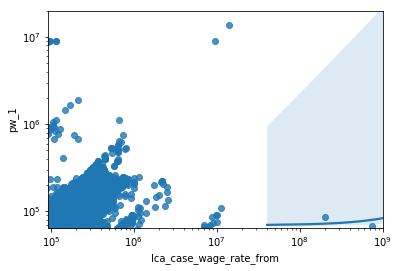

In [44]:
# let's see some scatters
rp = sns.regplot(x="lca_case_wage_rate_from", y="pw_1", data=h1b)
rp.set(xlim=(0,1e9), ylim=(0, 2e7), xscale='log', yscale='log')

In [1]:
h1b[pd.notnull(h1b["lca_case_wage_rate_to"])].shape

NameError: name 'h1b' is not defined

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(h1b["lca_case_wage_rate_from"], h1b["lca_case_wage_rate_to"])

NameError: name 'plt' is not defined

In [ ]:
# From Google, 2014 numbers
sfpop = 852537
nypop = 8.472e6

In [20]:
# See are there any janky SOC codes since they'll be important
h1b.fillna("janky").groupby("lca_case_soc_code").size().sort_values(ascending=False)

lca_case_soc_code
15-1121       92592
15-1132       77878
15-1131       72088
15-1199       38756
15-1133       15726
13-1111       11480
13-2011        9451
13-2051        9079
15-1142        8130
2021-11-01     8029
17-2141        7272
15-1141        7248
13-1161        7241
17-2072        6443
17-2071        5740
15-2031        5455
29-1069        5447
19-1042        4458
15-1134        3738
19-1021        3238
17-2112        3220
29-1123        3200
15-2041        2781
19-1029        2781
17-2051        2359
17-2199        2289
29-1063        2205
1931-11-01     2173
19-2031        2131
27-1024        1963
              ...  
19-3099.01        1
41-012            1
17.2072           1
1702141           1
172071            1
15-1131.0         1
49-9071           1
15-1130           1
49-9081           1
15-1121.01        1
15-1121.0         1
49-9099           1
15-112            1
15-1119           1
43-3051           1
43-3031.00        1
19-1023.00        1
19-1024           1
19

In [24]:
# some of these don't have the correct format, including some of the high ranking ones...
# this one looks more like a date
# maybe it's a different visa class like the Aussie/Singapore ones
h1b[h1b["lca_case_soc_code"] == "2021-11-01"].loc[:, ["lca_case_soc_code", 'visa_class', "lca_case_job_title", 'lca_case_employer_name']]

,lca_case_soc_code,visa_class,lca_case_job_title,lca_case_employer_name
23,2021-11-01,H-1B,SENIOR IMPLEMENTATION CONSULTANT,"FRS AMERICA, INC."
28,2021-11-01,H-1B,MANAGER IT,CCH INCORPORATED
166,2021-11-01,H-1B,SR. MANAGER,1199 NATIONAL BENEFIT FUND FOR HEALTH AND HUMA...
256,2021-11-01,H-1B,ENVIRONMENT MANAGER,JPMORGAN CHASE & CO.
716,2021-11-01,H-1B,SENIOR IMPLEMENTATION CONSULTANT,"FRS AMERICA, INC."
3273,2021-11-01,H-1B,IT MANAGER,CCH INCORPORATED
3326,2021-11-01,H-1B,PROGRAM MANAGER II,"EXPEDIA, INC."
3436,2021-11-01,H-1B,"MANAGER, ACCOUNT DELIVERY","HP ENTERPRISE SERVICES, LLC"
3575,2021-11-01,H-1B,IT PROJECT MANAGEMENT SENIOR ADVISOR,DELL USA LP
3637,2021-11-01,H-1B,PRODUCT MANAGER,NOKIA INC.


In [25]:
h1b[h1b["lca_case_soc_code"] == "1931-11-01"].loc[:, ["lca_case_soc_code", 'visa_class', "lca_case_job_title", 'lca_case_employer_name']]

,lca_case_soc_code,visa_class,lca_case_job_title,lca_case_employer_name
88,1931-11-01,H-1B,VICE PRESIDENT OF FINANCE,SOLVOYO CO
3289,1931-11-01,H-1B,SENIOR DIRECTOR/ACCOUNT EXECUTIVE,"NEWEDGE USA, LLC"
4263,1931-11-01,H-1B,CHIEF OF STAFF (CHIEF OF FINANCIAL STRATEGY),PFIZER INC
4333,1931-11-01,H-1B,ASSOCIATE DIRECTOR,STANDARD & POOR'S FINANCIAL SERVICES LLC
4502,1931-11-01,H-1B,CHIEF FINANCIAL OFFICER,"FIRSTLINE SCHOOLS, INC."
4636,1931-11-01,H-1B,"MANAGER, PROGRAM PUBLICITY","DISCOVERY COMMUNICATIONS, LLC"
4876,1931-11-01,H-1B,PROGRAM DIRECTOR,CITIGROUP GLOBAL MARKETS INC.
5086,1931-11-01,H-1B,CORPORATE BANKING ASSOCIATE,"CITICORP NORTH AMERICA, INC."
5137,1931-11-01,H-1B,BUSINESS CONTRACT MANAGER,"CITIZENS FINANCIAL GROUP, INC."
5212,1931-11-01,H-1B,STRATEGIC PLANNING AND SUSTAINABILITY MANAGER,"DOW KOKAM MI, LLC"


In [26]:
# let's check the industry code too
h1b.fillna("janky").groupby("lca_case_naics_code").size().sort_values(ascending=False)

# from siccode.com
# 1st is Custom Computer Programming Services
# 2nd is Computer Systems Design Services
# 3rd is Colleges, Universities, and Professional Schools
# 4th is Other Computer Related Services
# 5th is Engineering Services
# 6th is 
# ...so it's overwhelmingly dominated by tech

lca_case_naics_code
541511.0    197473
541512.0     28594
611310.0     25495
541519.0     12047
541330.0     11340
541510.0     11321
5416.0        8349
54161.0       7507
622110.0      6875
523110.0      6613
54151.0       6227
511210.0      5797
541211.0      5235
541710.0      4647
5415.0        4628
611110.0      4314
541611.0      4141
621111.0      4083
51121.0       4047
334413.0      3476
454111.0      3010
334220.0      2982
3344.0        2940
334111.0      2396
621340.0      2285
522110.0      2225
541500.0      2008
541990.0      2008
518112.0      1901
518210.0      1840
             ...  
327332.0         1
331410.0         1
33232.0          1
32531.0          1
32522.0          1
331524.0         1
32513.0          1
332110.0         1
332210.0         1
332215.0         1
327121.0         1
326212.0         1
326210.0         1
32629.0          1
33231.0          1
324512.0         1
33149.0          1
325119.0         1
33132.0          1
33122.0          1
33120.0    

In [ ]:
# from the webpage:
# NAICS codes array the economy into 20 sectors, which are separated into 99 3-digit subsectors,
# which are divided into 311 4-digit industry groups, which are further subdivided into 709 5-digit industries, 
# and finally disaggregated into 1057 6-digit U.S. industries